# Import Library

In [1]:
import pandas as pd

In [2]:
from bokeh.plotting import figure
from bokeh.io import curdoc
from bokeh.models import ColumnDataSource, HoverTool, Select
from bokeh.models.widgets import Tabs, Panel
from bokeh.layouts import row, widgetbox

# Data Preparation

In [3]:
data = pd.read_csv("Covid19_dataset.csv",parse_dates=['date'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149484 entries, 0 to 149483
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    149484 non-null  object        
 1   continent                                   140464 non-null  object        
 2   location                                    149484 non-null  object        
 3   date                                        149484 non-null  datetime64[ns]
 4   total_cases                                 146874 non-null  float64       
 5   new_cases                                   146868 non-null  float64       
 6   new_cases_smoothed                          145723 non-null  float64       
 7   total_deaths                                129842 non-null  float64       
 8   new_deaths                                  130037 non-null  float64      

In [5]:
df = data[['continent','location','date','total_cases','new_cases','total_deaths','new_deaths']]
df

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
149479,Africa,Zimbabwe,2021-12-19,191673.0,2106.0,4782.0,3.0
149480,Africa,Zimbabwe,2021-12-20,195079.0,3406.0,4805.0,23.0
149481,Africa,Zimbabwe,2021-12-21,197768.0,2689.0,4819.0,14.0
149482,Africa,Zimbabwe,2021-12-22,199404.0,1636.0,4828.0,9.0


In [6]:
df.isnull().sum()

continent        9020
location            0
date                0
total_cases      2610
new_cases        2616
total_deaths    19642
new_deaths      19447
dtype: int64

In [7]:
df['total_cases'].fillna(0,inplace=True)
df['new_cases'].fillna(0,inplace=True)
df['total_deaths'].fillna(0,inplace=True)
df['new_deaths'].fillna(0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
df.isnull().sum()

continent       9020
location           0
date               0
total_cases        0
new_cases          0
total_deaths       0
new_deaths         0
dtype: int64

In [9]:
#Mengambil data negara Asia
df_asia = df[df['continent'] == 'Asia']

In [10]:
df_asia['location'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macao',
       'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal',
       'Northern Cyprus', 'Oman', 'Pakistan', 'Palestine', 'Philippines',
       'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka',
       'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor', 'Turkey',
       'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam',
       'Yemen'], dtype=object)

In [11]:
df_asia.drop(columns='continent',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
df_indo = df_asia[df_asia['location'] == 'Indonesia']

In [14]:
df_indo

,location,date,total_cases,new_cases,total_deaths,new_deaths
63427,Indonesia,2020-03-02,2.0,2.0,0.0,0.0
63428,Indonesia,2020-03-03,2.0,0.0,0.0,0.0
63429,Indonesia,2020-03-04,2.0,0.0,0.0,0.0
63430,Indonesia,2020-03-05,2.0,0.0,0.0,0.0
63431,Indonesia,2020-03-06,4.0,2.0,0.0,0.0
...,...,...,...,...,...,...
64084,Indonesia,2021-12-19,4260544.0,164.0,144002.0,4.0
64085,Indonesia,2021-12-20,4260677.0,133.0,144013.0,11.0
64086,Indonesia,2021-12-21,4260893.0,216.0,144024.0,11.0
64087,Indonesia,2021-12-22,4261072.0,179.0,144034.0,10.0


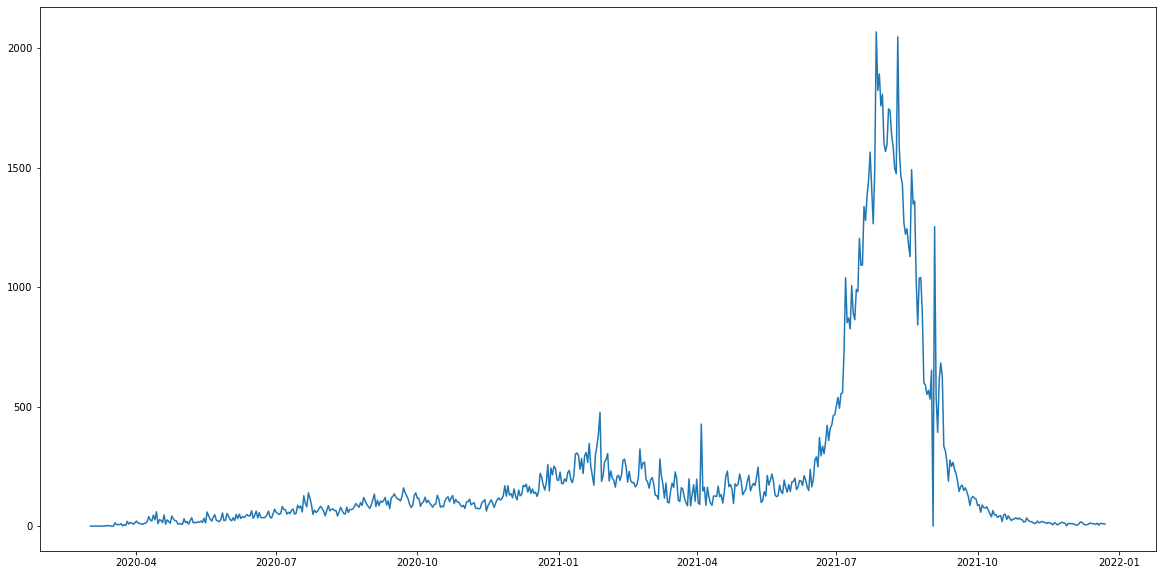

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df_indo['date'],df_indo['new_deaths'])

# BOKEH

In [16]:
#Membuat data untuk source awal plottingan
df_select = df_asia[df_asia['location'] == 'Indonesia']
df_select2 = df_asia[df_asia['location'] == 'Malaysia']

In [17]:
#Membuat source data untuk plotting data
source1 = ColumnDataSource(data={
    'x' : df_select['date'],
    'y' : df_select['new_cases'],
    
})
source2 = ColumnDataSource(data={
    'x' : df_select2['date'],
    'y' : df_select2['new_cases'],
})

In [18]:
#Mengatur Figure gambar
fig_gambar = figure(title='Data Covid-19 di Asia',
                   plot_height=550, plot_width=1000,
                   x_axis_type = 'datetime',
                   x_axis_label='Date', y_axis_label='Jumlah Orang',
                   tools=['pan', 'wheel_zoom', 'save', 'reset'])

#Negara 1
fig_gambar.line(x='x', y='y',
              color='coral',
              line_width=2,
              source=source1,
              legend_label ='Negara 1')

#Negara 2
fig_gambar.line(x='x', y='y',
              color='cornflowerblue',
              line_width=2,
              source=source2,
              legend_label = 'Negara 2')

#Lokasi & Fitur Legend
fig_gambar.legend.location = 'top_left'
fig_gambar.legend.click_policy = 'mute'

#Menambahkan Hover
fig_gambar.add_tools(HoverTool(tooltips=[
                                ('Date','@x{%F}'),
                                ('new_cases', '@y')
                               ],formatters={'@x': 'datetime'},
                               mode='vline'))

In [19]:
def update_plot(attr, old, new):
    #Mengambil pilihan data Negara
    pilihan1 = select1.value
    pilihan3 = select3.value
    
    #Mengambil pilihan Negara
    pilihan0 = select0.value
    pilihan2 = select2.value
    
    #Membuat data berdasarkan pilihan negara
    df_select = df_asia[df_asia['location'] == pilihan0]
    df_select2 = df_asia[df_asia['location'] == pilihan2]
    
    #Membuat data baru berdasarkan pilihan
    new_source1 = {
        'x' : df_select['date'],
        'y' : df_select[pilihan1]
    }
    new_source2 = {
        'x' : df_select2['date'],
        'y' : df_select2[pilihan3]
    }
    
    #Memasukan data baru ke source plot
    source1.data = new_source1
    source2.data = new_source2

In [20]:
def updateNegara_plot(attr, old, new):
    #Mengambil pilihan data Negara
    pilihan0 = select0.value
    pilihan2 = select2.value

    #Membuat data berdasarkan pilihan negara
    df_select = df_asia[df_asia['location'] == pilihan0]
    df_select2 = df_asia[df_asia['location'] == pilihan2]
    
    #Membuat data baru berdasarkan pilihan
    new_source1 = {
        'x' : df_select['date'],
        'y' : df_select['new_cases']
    }
    new_source2 = {
        'x' : df_select2['date'],
        'y' : df_select2['new_cases']
    }
    
    #Memasukan data baru ke source plot
    source1.data = new_source1
    source2.data = new_source2

In [21]:
#Pilihan pada Select berupa List Seluruh Negara
#Membuat pilihan Negara
option0 = df_asia['location'].unique().tolist()

#Membuat pilihan data Negara
option1 = df_indo.columns.to_list()
del option1[0]
del option1[0]

##Menu pilihan Negara 1
#Select0 untuk memilih Negara 1
select0 = Select(
    options = option0,
    title = 'Pilih Negara 1',
    value = 'Indonesia'
)

#Select1 untuk memilih data Negara 1
select1 = Select(
    options = option1,
    title = 'Pilih Data Negara 1',
    value = 'new_cases'
)

##Menu pilihan Negara 2
#Select2 untuk memilih Negara 2
select2 = Select(
    options = option0,
    title = 'Pilih Negara 2',
    value = 'Malaysia'
)

#Select3 untuk memilih data Negara 2
select3 = Select(
    options = option1,
    title = 'Pilih Data Negara 2',
    value = 'new_cases'
) 

#Jika select dipilih
select0.on_change('value', updateNegara_plot)
select1.on_change('value', update_plot)
select2.on_change('value', updateNegara_plot)
select3.on_change('value', update_plot)

In [22]:
#Membuat layout gambar
layout = row(widgetbox(select0,select1,select2,select3), fig_gambar)

#Membuat Panel gambar
panel1 = Panel(child=layout, title='Visualisasi Perbandingan Data Covid-19')

#Membuat Tabel dengan Panel yang ada
tabs = Tabs(tabs=[panel1,])

curdoc().add_root(tabs)